In [71]:
import pandas as pd
import pprint as pp
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

pd.options.display.float_format = '{:,.2f}'.format

In [108]:
url = "../../resources/science-data/"
df = pd.read_csv(url + "vaccination.csv", usecols=['Unique ID','Country', 'covidcases', 'coviddeaths', 'mortalityperm', 'trustngov', 'poptrusthealth'], sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
df[['Country', 'covidcases', 'coviddeaths', 'mortalityperm']] = df[['Country', 'covidcases', 'coviddeaths', 'mortalityperm']].astype(int)
df[['trustngov', 'poptrusthealth']] = df[['trustngov', 'poptrusthealth']].astype(float)
country_codes = {1: 'Brazil', 2: 'Canada', 3: 'China', 4: 'Ecuador', 5: 'France', 6: 'Germany', 7: 'India', 8: 'Italy', 9: 'Mexico', 10: 'Nigeria', 11: 'Poland', 12: 'Russia', 13: 'South Africa', 14: 'South Korea', 15: 'Singapore', 16: 'Spain', 17: 'Sweden', 18: 'United Kingdom', 19: 'United States'}
df['Country Name'] = df['Country'].map(country_codes)
df = df.rename(columns={'country_name': 'Country', 'covidcases': 'Cases', 'coviddeaths': 'Deaths', 'mortalityperm': 'Mortality per Mil', 'trustngov': 'Trust Gov', 'poptrusthealth': 'Trust Health'})
df = df.drop(columns=['Unique ID', 'Country']).drop_duplicates().set_index('Country Name')

In [109]:
df

,Cases,Deaths,Mortality per Mil,Trust Gov,Trust Health
Country Name,,,,,
Canada,99853,8254,219,0.65,0.81
Ecuador,48490,4007,227,0.49,0.36
Germany,190179,8927,107,0.54,0.85
Mexico,159793,19080,148,0.37,0.55
Poland,30701,1286,34,0.56,0.48
South Africa,41216,26,4,0.74,0.84
South Korea,80412,1674,28,0.42,0.91
United Kingdom,299251,42153,621,0.51,0.66
United States,2234475,119941,362,0.47,0.62


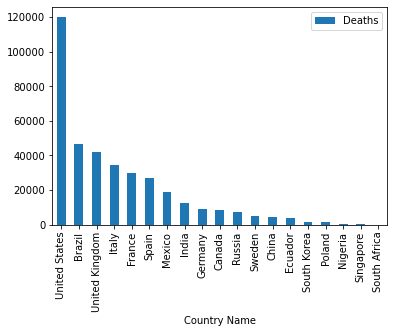

In [95]:
df.sort_values(by='Deaths', ascending=False).plot(kind='bar', y='Deaths')
plt.show()

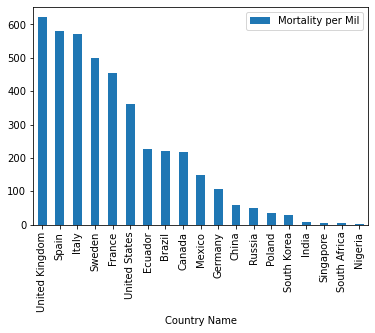

In [96]:
df.sort_values(by='Mortality per Mil', ascending=False).plot(kind='bar', y='Mortality per Mil')
plt.show()

In [103]:
def create_scatter(x_values, y_values, title, xlabel, ylabel, alpha):
    plt.scatter(x_values, y_values, alpha=alpha)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    slope, intercept, r_value, p_value, std_err = sts.linregress(x_values, y_values)
    plt.plot(x_values, x_values * slope + intercept)
    print(f"r-squared: {round(r_value ** 2, 3)}")

r-squared: 0.027


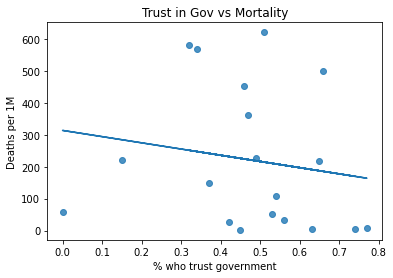

In [104]:
create_scatter(df['Trust Gov'], df['Mortality per Mil'], 'Trust in Gov vs Mortality', '% who trust government', 'Deaths per 1M', 0.8)

r-squared: 0.085


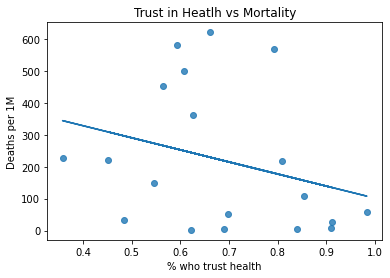

In [105]:
create_scatter(df['Trust Health'], df['Mortality per Mil'], 'Trust in Heatlh vs Mortality', '% who trust health', 'Deaths per 1M', 0.8)

In [76]:
nytimes = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
nytimes.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [125]:
state_names = dict(state_fips['Name'])
state_abbrvs = dict(state_fips['Postal Code'])

In [149]:
state_fips = pd.read_csv(url + 'fips_state.csv').set_index('FIPS')
vaccine_df = pd.read_csv(url + 'nispuf.csv')
vaccine_df.head()
vaccine_df['State'] = vaccine_df['FIPS'].map(state_names)
vaccine_df['State Abbr'] = vaccine_df['FIPS'].map(state_abbrvs)
vaccine_df = vaccine_df.fillna(0)
vaccine_df['First MMR (mos)'] = vaccine_df['First MMR (mos)'].astype(int)
vaccine_df['Had MMR'] = vaccine_df['First MMR (mos)'].astype(bool)

In [150]:
vaccine_df.head()

,Age Group - Child,Received WIC,Hispanic,Income-Poverty Ratio,Income Status,Age Group - Mother,Race,Sex,FIPS,First MMR (mos),State,State Abbr,Had MMR
0,3,2,2,3.00,14,2,1,2,28,0,Mississippi,MS,False
1,2,2,2,3.00,14,2,1,2,15,12,Hawaii,HI,True
2,2,1,2,1.27,10,1,1,2,26,22,Michigan,MI,True
3,1,1,1,2.05,12,1,1,1,4,0,Arizona,AZ,False
4,2,2,2,2.05,12,2,1,1,15,0,Hawaii,HI,False


In [167]:
pd.DataFrame(vaccine_df.groupby('State Abbr')['Had MMR'].value_counts()).head(10)

Had MMR
State Abbr Had MMR         
0          False        295
           True         294
AK         False        202
           True         194
AL         False        284
           True         282
AR         True         227
           False        225
AZ         False        256
           True         232

In [174]:
had_mmr = pd.DataFrame(vaccine_df.groupby('State Abbr')['Had MMR'].sum())
had_mmr['Total'] = vaccine_df.groupby('State Abbr')['Had MMR'].count()
had_mmr['Percent'] = 100 * had_mmr['Had MMR'] / had_mmr['Total']
had_mmr

,Had MMR,Total,Percent
State Abbr,,,
0,294.00,589,49.92
AK,194.00,396,48.99
AL,282.00,566,49.82
AR,227.00,452,50.22
AZ,232.00,488,47.54
CA,270.00,626,43.13
CO,230.00,446,51.57
CT,158.00,319,49.53
DE,230.00,481,47.82


In [ ]:
pd.DataFrame()